<div style="text-align: right">Dec 1<sup>th</sup> 2021</div>

# Programming Tutorial, Day 3
Part of the *Better With Scattering* Workshop by www.bam.de

### Loading data from day 2

In [1]:
import pandas
fnData = 'data/Ag_N008.dat'
dataframe = pandas.read_csv(fnData, sep=r'\s+', names=("q", "I", "uI"))
dataframe

,q,I,uI
0,0.030259,4769.301045,1655.363275
1,0.030719,5346.031551,2218.324041
2,0.031096,6387.856371,1534.356131
3,0.031611,2986.364914,1984.290104
4,0.032103,5634.075856,1367.733213
...,...,...,...
530,14.165907,0.036509,0.024799
531,14.334260,0.019789,0.024856
532,14.504613,0.036952,0.024934
533,14.676991,0.053573,0.025039


## Calculating and plotting a scattering model

### Scattering vector *Q*

Create a function *scattering_vector_q* (with `def`) for the scattering vector *Q* in small angle scattering:

$Q = {4\pi \over \lambda} \cdot sin({\theta\over2}{2\pi\over 360})$

With parameters for the angle $\theta$ (in degrees) and the wave length $\lambda$ (typically in nm).
Use functions from the numpy module preferably.  
The wave length can be set to a default value of 0.15406 nm for Copper K-α radiation.

In [2]:
import numpy
def scattering_vector_q(rad, wavelength=0.15406):
    return 4*numpy.pi/wavelength * numpy.sin(numpy.radians(rad/2))

#### A linear range of angles

Use numpy to generate an array of 500 angles between 0.01 and 5 degrees.  
Helpful links (with examples at the end):  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html  
*Hint checking the result: The size of an array (number of values) is provided by its **.shape** attribute. It contains how many values are store in each dimension.*

In [3]:
import numpy
theta = numpy.arange(1e-2, 180, 180/501)
numpy.set_printoptions(threshold=100, edgeitems=10) # default
theta#, theta.shape

array([1.00000000e-02, 3.69281437e-01, 7.28562874e-01, 1.08784431e+00,
       1.44712575e+00, 1.80640719e+00, 2.16568862e+00, 2.52497006e+00,
       2.88425150e+00, 3.24353293e+00, ..., 1.76417186e+02,
       1.76776467e+02, 1.77135749e+02, 1.77495030e+02, 1.77854311e+02,
       1.78213593e+02, 1.78572874e+02, 1.78932156e+02, 1.79291437e+02,
       1.79650719e+02])

In [4]:
theta = numpy.linspace(1e-2, 180, 500)
theta#, theta.shape

array([1.00000000e-02, 3.70701403e-01, 7.31402806e-01, 1.09210421e+00,
       1.45280561e+00, 1.81350701e+00, 2.17420842e+00, 2.53490982e+00,
       2.89561122e+00, 3.25631263e+00, ..., 1.76753687e+02,
       1.77114389e+02, 1.77475090e+02, 1.77835792e+02, 1.78196493e+02,
       1.78557194e+02, 1.78917896e+02, 1.79278597e+02, 1.79639299e+02,
       1.80000000e+02])

#### A logarithmic range of angles

Try also logarithmic spacing. Works best with logarithmic axes in plotting later:  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html  
*Corrects arguments can be tricky. They have to be converted to their corresponding exponents for the basis 10 first, use [numpy.log10()](https://numpy.org/doc/1.18/reference/generated/numpy.log10.html) for that.* 😉

In [5]:
theta = numpy.logspace(numpy.log10(1e-2), numpy.log10(180), 500)
theta#, theta.shape

array([1.00000000e-02, 1.01982957e-02, 1.04005235e-02, 1.06067614e-02,
       1.08170889e-02, 1.10315872e-02, 1.12503388e-02, 1.14734282e-02,
       1.17009413e-02, 1.19329660e-02, ..., 1.50842633e+02,
       1.53833777e+02, 1.56884235e+02, 1.59995182e+02, 1.63167817e+02,
       1.66403365e+02, 1.69703072e+02, 1.73068211e+02, 1.76500079e+02,
       1.80000000e+02])

#### Calculate the scattering vector
Use the function defined in the previous exercise to calculate the scattering vector *Q* from the generate angles above and store it in a variable.

In [6]:
q = scattering_vector_q(theta)
q

array([7.11815338e-03, 7.25930330e-03, 7.40325216e-03, 7.55005547e-03,
       7.69976982e-03, 7.85245295e-03, 8.00816371e-03, 8.16696216e-03,
       8.32890950e-03, 8.49406820e-03, ..., 7.89417741e+01,
       7.94507463e+01, 7.99140577e+01, 8.03282321e+01, 8.06896451e+01,
       8.09945234e+01, 8.12389446e+01, 8.14188383e+01, 8.15299871e+01,
       8.15680294e+01])

#### Create a plot of the scattering vector over the angles.

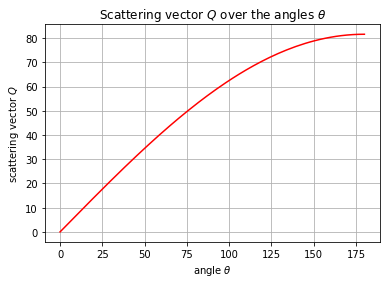

In [7]:
import matplotlib.pyplot as plt
plt.plot(theta, q, color="red")
plt.xlabel(r"angle $\theta$")
plt.ylabel(r"scattering vector $Q$")
plt.title(r"Scattering vector $Q$ over the angles $\theta$")
plt.grid();

### A sphere model for small-angle scattering

In small-angle scattering the form factor of a sphere is given by

$F(Q, r) = { 3 ~ sin(Qr) - Qr \cdot cos(Qr) \over (Qr)^3 }$

It describes the scattering amplitude of exact spherical scatterers of radius *r*.
The scattering intensity is the amplitude squared. Assuming the contrast is 1 (and thus the scattering length density difference), it can be simplified to:

$ I(Q, r) = F(Q, r)^2 $

1. Implement a function for calculating the intensity of spheres.
2. Use that function and the *Q*-vector from above to calculate the intensity of spheres of 25 nm radius and store it in a variable.

In [8]:
def sphere(q, radius, N=1, eta=1):
    qr = numpy.outer(q,radius)
    qr = qr.flatten() if qr.shape[1] == 1 else qr
    return (N * (3. * eta * (numpy.sin(qr) - qr * numpy.cos(qr)) / (qr**3.))**2)

ff = sphere(dataframe.q, 25.)
ff

array([8.91009934e-01, 8.87836243e-01, 8.85208144e-01, 8.81576481e-01,
       8.78068417e-01, 8.74008408e-01, 8.70407975e-01, 8.66676594e-01,
       8.63241590e-01, 8.59340233e-01, ..., 3.31701539e-10,
       4.71449413e-12, 4.39708329e-10, 5.71995182e-10, 5.11869466e-11,
       2.49510976e-10, 5.20276713e-10, 2.84265172e-11, 3.19994759e-10,
       3.31274520e-10])

#### Plot the sphere form factor

Plot the calculated sphere intensity over the scattering vector. Try different values for:
1. The number of *Q* values generated at the beginning, how does that change the plot?
2. The radius of the spheres, how does it affect the plotted curve?
*Hint: For playing with different radius values, it's easier to put the function call for the intensity in the plot command directly, instead of storing it in a variable first which is plotted then.*

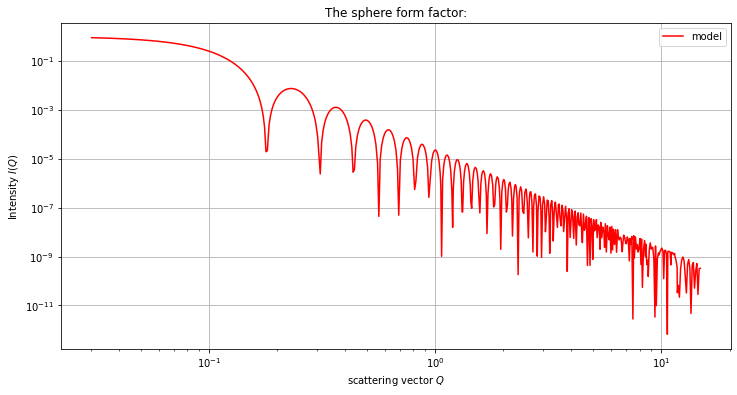

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(dataframe.q, sphere(dataframe.q, 25.), color="red", label="model")
def prettyPlot():
    plt.xlabel("scattering vector $Q$")
    plt.ylabel("Intensity $I(Q)$")
    plt.title("The sphere form factor:")
    plt.xscale('log'); plt.yscale('log');
    plt.grid(True); plt.legend();
prettyPlot()

#### Plot the measured data as well

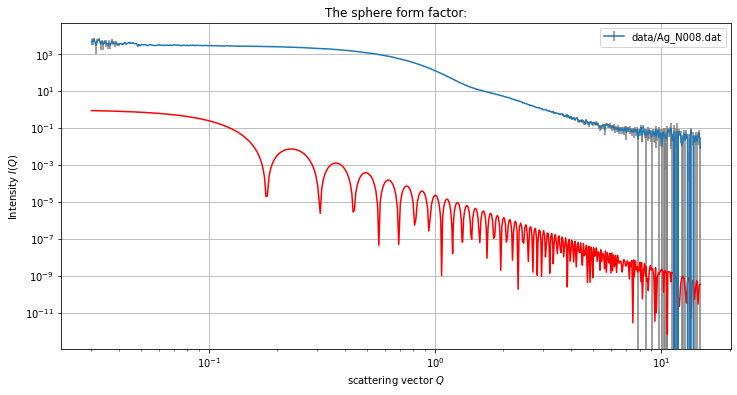

In [10]:
dataframe.plot("q", "I", yerr="uI", loglog=True, ecolor="gray", grid=True, label=fnData, figsize=(12,6));
import matplotlib.pyplot as plt
plt.plot(dataframe.q, sphere(dataframe.q, 25.), color="red")
prettyPlot()

## Fitting the model to the data

### Create lmfit Parameters for fitting

Define parameters for *N*, $\eta$ (eta) and for the radius. Only *N* and the radius need to be fitted/varied because the scattering contrast $\eta$ should be a known constant.

Hint: *Use `Parameters.pretty_print()` to get the `lmfit` objects formatted nicely.*

In [11]:
from lmfit import Parameters
params = Parameters()
params.add("N",        value=1,   min=0,  max=1e10, vary=True)
params.add("eta",      value=1,   min=0,  max=1e10, vary=False)
params.add("radius",   value=50,  min=0,  max=150,  vary=True)
params.pretty_print()

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
N              1        0    1e+10     None     True     None     None
eta            1        0    1e+10     None    False     None     None
radius        50        0      150     None     True     None     None


### Creating a model

In [12]:
from lmfit import Model
model = Model(sphere)

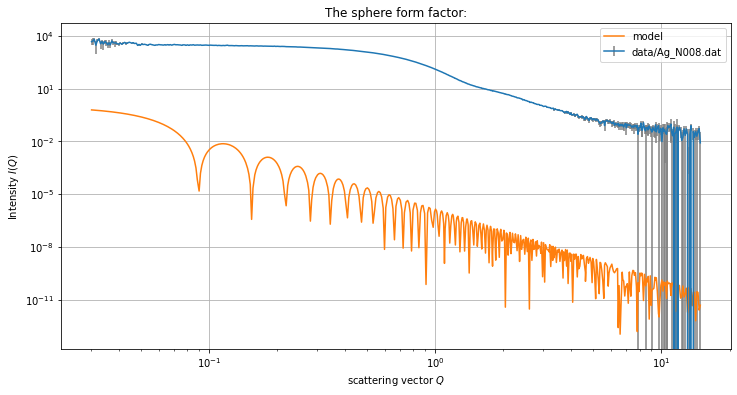

In [13]:
plt.figure(figsize=(12,6))
plt.errorbar(dataframe.q, dataframe.I, yerr=dataframe.uI, ecolor="gray", label=fnData)
plt.plot(dataframe.q, model.eval(params, q=dataframe.q), label="model")
prettyPlot()

In [14]:
model.eval(params, q=dataframe.q)

array([6.22589144e-01, 6.13274518e-01, 6.05629418e-01, 5.95166263e-01,
       5.85170316e-01, 5.73737254e-01, 5.63719456e-01, 5.53456780e-01,
       5.44116212e-01, 5.33631231e-01, ..., 2.90130055e-13,
       4.20905467e-11, 4.48011742e-12, 2.65324456e-11, 2.56356559e-11,
       6.23153970e-13, 2.81488028e-11, 2.57063062e-11, 2.52116556e-12,
       4.79913487e-12])

### Fitting the model and showing the results

In [15]:
fitresult = model.fit(dataframe.I, params, q=dataframe.q, weights=1/dataframe.uI)
print(fitresult.fit_report())

[[Model]]
    Model(sphere)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 135
    # data points      = 535
    # variables        = 2
    chi-square         = 2008928.65
    reduced chi-square = 3769.09690
    Akaike info crit   = 4407.50228
    Bayesian info crit = 4416.06681
[[Variables]]
    N:       1345160.16 +/- 426966.398 (31.74%) (init = 1)
    eta:     1 (fixed)
    radius:  114.614593 +/- 4.13631567 (3.61%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(N, radius) = 0.440


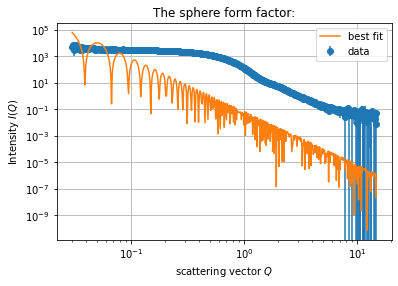

In [16]:
fitresult.plot_fit(fit_kws=dict(zorder=5))
prettyPlot()

## Fitting a model with polydispersity to the data

### Create a probability density function (PDF)

1. Use this definition of the Log-Normal distribution function around the median:  

$${PDF}_{lognorm}(R, \sigma, R_{median})=\frac{1}{\sqrt{2\pi}\, \sigma R }e^{\frac{-\left(\ln{\frac{R}{R_{median}}}\right)^{2}}{2\sigma^{2}}}$$

2. And plot it with a $R_{median}=30$ and $\sigma=0.2$ over a linear range covering $\left[\;R_{min}, R_{max}\;\right]$ with $R_{min}=10^{-3}$ and $R_{max}=3 R_{median}$.

3. Calculate its integral using the generated and calculated values for $R$ and ${PDF}_{lognorm}$ as $x$ and $y$. It should be near to 1, depends on the number of intervals chosen for the linear range. Use the following integration routine:

In [17]:
import scipy.integrate
def integrate(xvec, yvec):
    return abs(scipy.integrate.simps(yvec, x=xvec))

In [18]:
def lognorm(x, sigma, r_median):
    return 1/(numpy.sqrt(2*numpy.pi)*sigma*x) * numpy.exp(-(numpy.log(x/r_median))**2 / (2*sigma*sigma))

The integral (area under the curve) is: 1.0


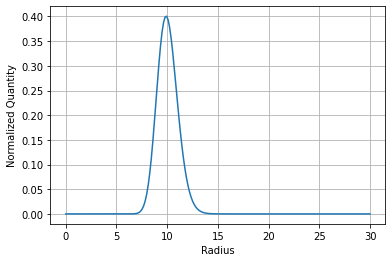

In [19]:
r_median, r_sigma, count = 10, .1, 200
x = numpy.linspace(1e-3, 3*r_median, count)
dist = lognorm(x, r_sigma, r_median)
plt.plot(x, dist)
plt.xlabel("Radius");
plt.ylabel("Normalized Quantity"); plt.grid();
print("The integral (area under the curve) is:", integrate(x, dist))

### Update the model first and plot it

The sphere model gets a additional parameters for the median radius $R_{median}$ and the distribution width $\sigma$. To weigh the model by the distribution, it has to be integrated over the range of radii from $R_{min}$ to $R_{max}$:

$$I_{poly}(Q, \eta, N, \sigma, R_{median}) = \int_{R_{min}}^{R_{max}} {PDF}_{lognorm}(r, \sigma, R_{median}) \; I(Q, N, \eta, r) \; \textrm{d}r$$

With $I(Q, N, \eta, r)$ from the previous exercise:

$$I(Q, N, \eta, r) = N \left[ { 3 ~ \eta ~ [sin(Qr) - Qr \cdot cos(Qr)] \over (Qr)^3 } \right]^2$$

For every single *Q* value, this integral has to be calculated. Plot the (now polydisperse) sphere model with the *Q* values loaded from file.

In [20]:
def sphere_pd(q, r_median, r_sigma, N=1, eta=1):
    radius = numpy.linspace(1e-3, 3*r_median, count)
    weight = lognorm(radius, r_sigma, r_median)
    sph = weight*sphere(q, radius, N, eta)
    return N * integrate(radius, sph)

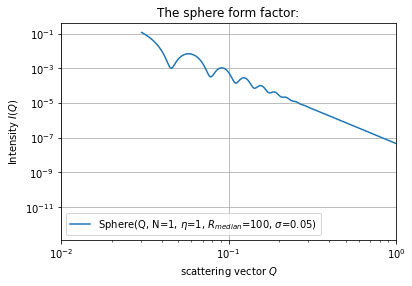

In [21]:
r_median=100; r_sigma=.05; N=1; eta=1
plt.plot(dataframe.q, sphere_pd(dataframe.q, r_median, r_sigma, N, eta),
         label=f"Sphere(Q, N={N}, $\eta$={eta}, $R_{{median}}$={r_median}, $\sigma$={r_sigma})")
plt.xlim(1e-2,1)
prettyPlot()

In [22]:
params.add("r_median", value=100,  min=0,  max=150,  vary=True)
params.add("r_sigma",  value=0.1,  min=0,  max=.5,   vary=True)
if "radius" in params:
    params.pop("radius")
params

name,value,initial value,min,max,vary
N,1.00000000,1,0.00000000,1.0000e+10,True
eta,1.00000000,1,0.00000000,1.0000e+10,False
r_median,100.000000,100,0.00000000,150.000000,True
r_sigma,0.10000000,0.1,0.00000000,0.50000000,True


In [23]:
from lmfit import Model
model = Model(sphere_pd)

In [24]:
fitresult = model.fit(dataframe.I, params, q=dataframe.q, weights=1/dataframe.uI)
print(fitresult.fit_report())

[[Model]]
    Model(sphere_pd)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 147
    # data points      = 535
    # variables        = 3
    chi-square         = 2067.80588
    reduced chi-square = 3.88685315
    Akaike info crit   = 729.307488
    Bayesian info crit = 742.154289
[[Variables]]
    N:         54.3158568 +/- 0.06617768 (0.12%) (init = 1)
    eta:       1 (fixed)
    r_median:  3.99305404 +/- 0.00631558 (0.16%) (init = 100)
    r_sigma:   0.23761763 +/- 0.00103360 (0.43%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r_median, r_sigma) = 0.898
    C(N, r_median)       = 0.740
    C(N, r_sigma)        = 0.502


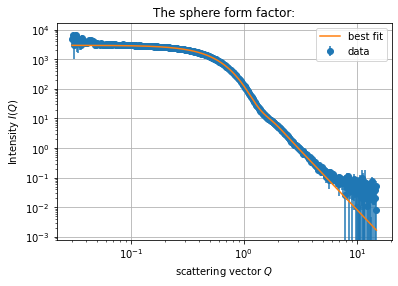

In [25]:
fitresult.plot_fit(fit_kws=dict(zorder=5))
prettyPlot()